# Chapter 9. 회귀분석(Ridge와 Lasso 모델의 활용)

### Ridge, Lasso 회귀분석을 활용한 정규화

In [1]:
# 수치 계산에 사용하는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from scipy.stats import norm

# 그래프를 그리는 데 사용하는 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

#  그래프 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (15, 4)
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] ='NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# 통계 모델을 추정하는 데 사용하는 라이브러리
import statsmodels.formula.api as smf
import statsmodels.api as sm

# 기계 학습 모델을 적용하기 위한 라이브러리
from sklearn import linear_model

# 표시 자릿수 지정
%precision 3

# 그래프를 주피터 노트북 내에 표시하기 위한 지정
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np

# 데이터 프레임 생성
# 크기: 150x100
# 샘플 칼럼 및 행
data = np.random.normal(loc=1.62, scale=0.2, size=(150, 100))
columns = [f'마트_{i}' for i in range(1, 101)]
df = pd.DataFrame(data, columns=columns)

# 값의 범위를 1.2에서 2.0 사이로 제한
df = df.clip(1.2, 2.0)

# CSV 파일로 저장
df.to_csv('generated_data.csv', index=False)

x = pd.read_csv("generated_data.csv")
x

,마트_1,마트_2,마트_3,마트_4,마트_5,마트_6,마트_7,마트_8,마트_9,마트_10,...,마트_91,마트_92,마트_93,마트_94,마트_95,마트_96,마트_97,마트_98,마트_99,마트_100
0,1.461214,1.561065,1.462272,1.757892,1.585746,1.476814,1.952472,1.575598,1.786147,1.555483,...,1.739433,1.620061,1.399648,1.747081,1.526385,1.514882,1.682174,1.376485,1.670821,1.650890
1,1.957742,1.539132,1.549601,1.393109,1.996707,1.200000,1.640135,1.619175,1.210780,1.481451,...,1.237507,1.635076,1.612696,1.481091,1.397907,1.810403,1.630584,1.444789,1.755232,1.523305
2,1.414481,1.742474,1.835115,2.000000,1.691943,1.686641,1.706277,1.558693,1.618064,1.431065,...,1.548939,1.367579,1.541028,1.530178,1.346361,1.525739,1.456138,1.562239,1.262507,1.540635
3,1.574510,1.583590,1.708129,1.776413,1.463920,1.509808,1.252267,1.656955,1.554937,1.796829,...,1.352708,1.735884,1.402473,1.312823,1.953267,1.473167,1.815337,1.536639,1.364470,1.786434
4,1.914275,1.547292,1.453268,1.859695,1.299269,1.498615,1.525205,1.729134,1.363111,1.650612,...,1.754464,1.425114,1.558397,1.424594,1.679556,1.824671,1.543118,1.931508,1.756976,1.685294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,1.794277,1.760657,1.264409,1.776230,1.240285,1.880946,1.470278,2.000000,1.615355,1.896020,...,1.683866,1.677607,1.777982,1.851017,1.923094,1.748697,1.638738,1.716955,1.606319,1.306280
146,1.827723,1.749087,1.649895,1.350225,1.750043,1.629492,1.813919,1.419867,1.680012,1.648693,...,1.790061,1.360336,1.474105,1.803297,1.804026,1.751548,1.590867,1.275572,1.660862,1.646588
147,1.570668,1.764266,1.569942,1.413869,1.635824,1.538189,1.462891,1.940588,1.442405,1.290410,...,1.364272,2.000000,1.696403,2.000000,1.629993,1.821322,1.570749,1.531399,1.691737,1.560625
148,1.905337,1.505268,1.606215,1.254312,1.293949,1.584874,1.484750,1.654898,1.554658,1.462923,...,1.779849,1.498854,1.815129,1.823174,1.774865,1.331136,1.371095,1.749480,1.788267,1.703975


In [3]:
### 표준화

# X_1의 평균값
np.mean(x['마트_1'])

1.6539238308971387

In [4]:
# 모든 칼럼 변수의 평균값 계산
np.mean(x, axis=0).head()

마트_1    1.653924
마트_2    1.616035
마트_3    1.607026
마트_4    1.586410
마트_5    1.606484
dtype: float64

In [5]:
# 표준화
x -= np.mean(x, axis=0)
x

,마트_1,마트_2,마트_3,마트_4,마트_5,마트_6,마트_7,마트_8,마트_9,마트_10,...,마트_91,마트_92,마트_93,마트_94,마트_95,마트_96,마트_97,마트_98,마트_99,마트_100
0,-0.192710,-0.054970,-0.144754,0.171481,-0.020738,-0.121413,0.314613,-0.029910,0.192590,-0.058750,...,0.123843,0.005011,-0.215943,0.135683,-0.091222,-0.107135,0.055147,-0.220368,0.020547,0.019769
1,0.303819,-0.076903,-0.057425,-0.193301,0.390223,-0.398226,0.002275,0.013667,-0.382777,-0.132782,...,-0.378083,0.020026,-0.002895,-0.130306,-0.219700,0.188387,0.003557,-0.152064,0.104958,-0.107816
2,-0.239443,0.126439,0.228088,0.413590,0.085460,0.088414,0.068418,-0.046815,0.024507,-0.183168,...,-0.066651,-0.247471,-0.074563,-0.081219,-0.271247,-0.096278,-0.170889,-0.034613,-0.387768,-0.090486
3,-0.079414,-0.032445,0.101102,0.190002,-0.142564,-0.088418,-0.385592,0.051447,-0.038620,0.182596,...,-0.262882,0.120834,-0.213118,-0.298575,0.335660,-0.148849,0.188310,-0.060213,-0.285805,0.155313
4,0.260351,-0.068743,-0.153758,0.273285,-0.307214,-0.099611,-0.112654,0.123626,-0.230445,0.036378,...,0.138874,-0.189936,-0.057194,-0.186803,0.061948,0.202655,-0.083909,0.334655,0.106702,0.054173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.140353,0.144622,-0.342617,0.189820,-0.366198,0.282720,-0.167581,0.394492,0.021799,0.281787,...,0.068276,0.062557,0.162390,0.239620,0.305486,0.126681,0.011711,0.120102,-0.043955,-0.324841
146,0.173799,0.133052,0.042869,-0.236185,0.143560,0.031266,0.176060,-0.185641,0.086455,0.034460,...,0.174471,-0.254714,-0.141487,0.191900,0.186418,0.129532,-0.036160,-0.321280,0.010587,0.015467
147,-0.083255,0.148231,-0.037085,-0.172541,0.029341,-0.060037,-0.174968,0.335081,-0.151152,-0.323823,...,-0.251318,0.384950,0.080811,0.388603,0.012386,0.199306,-0.056278,-0.065454,0.041463,-0.070495
148,0.251413,-0.110767,-0.000812,-0.332098,-0.312535,-0.013352,-0.153109,0.049390,-0.038898,-0.151310,...,0.164259,-0.116196,0.199538,0.211777,0.157257,-0.290881,-0.255932,0.152627,0.137993,0.072854


In [6]:
x /= np.std(x, ddof=1, axis=0)

In [7]:
x

,마트_1,마트_2,마트_3,마트_4,마트_5,마트_6,마트_7,마트_8,마트_9,마트_10,...,마트_91,마트_92,마트_93,마트_94,마트_95,마트_96,마트_97,마트_98,마트_99,마트_100
0,-0.970277,-0.289583,-0.760754,0.845812,-0.106397,-0.621579,1.700050,-0.156745,1.053230,-0.284127,...,0.661391,0.026206,-1.151628,0.717880,-0.459713,-0.510394,0.292011,-1.225654,0.103769,0.112886
1,1.529700,-0.405130,-0.301797,-0.953436,2.002044,-2.038739,0.012295,0.071622,-2.093316,-0.642163,...,-2.019168,0.104722,-0.015439,-0.689428,-1.107176,0.897485,0.018833,-0.845758,0.530078,-0.615651
2,-1.205575,0.666090,1.198719,2.039984,0.438453,0.452641,0.369706,-0.245334,0.134026,-0.885842,...,-0.355955,-1.294120,-0.397648,-0.429717,-1.366943,-0.458672,-0.904883,-0.192513,-1.958381,-0.516691
3,-0.399841,-0.170920,0.531344,0.937165,-0.731426,-0.452662,-2.083597,0.269612,-0.211205,0.883074,...,-1.403934,0.631888,-1.136561,-1.579711,1.691549,-0.709125,0.997129,-0.334897,-1.443427,0.886866
4,1.310846,-0.362143,-0.808075,1.347946,-1.576166,-0.509965,-0.608740,0.647867,-1.260252,0.175934,...,0.741661,-0.993249,-0.305017,-0.988346,0.312188,0.965457,-0.444311,1.861303,0.538888,0.309337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.706667,0.761879,-1.800624,0.936266,-1.878785,1.447400,-0.905544,2.067353,0.119212,1.362782,...,0.364630,0.327136,0.866029,1.267790,1.539492,0.603513,0.062014,0.667991,-0.221992,-1.854902
146,0.875063,0.700925,0.225298,-1.164955,0.736534,0.160068,0.951361,-0.972860,0.472801,0.166656,...,0.931772,-1.331996,-0.754550,1.015313,0.939450,0.617096,-0.191472,-1.786913,0.053471,0.088319
147,-0.419184,0.780892,-0.194899,-0.851038,0.150533,-0.307363,-0.945464,1.756004,-0.826616,-1.566078,...,-1.342177,2.013052,0.430967,2.056037,0.062417,0.949502,-0.298001,-0.364045,0.209406,-0.402542
148,1.265843,-0.583531,-0.004265,-1.638036,-1.603464,-0.068355,-0.827343,0.258831,-0.212726,-0.731769,...,0.877235,-0.607636,1.064138,1.120481,0.792496,-1.385769,-1.355199,0.848891,0.696919,0.416008


In [8]:
# 평균이 0임을 확인
np.mean(x, axis=0).head(3).round(3)

마트_1   -0.0
마트_2    0.0
마트_3   -0.0
dtype: float64

In [9]:
# 표준편차가 1 임을 확인
np.std(x, ddof=1, axis=0).head(3)

마트_1    1.0
마트_2    1.0
마트_3    1.0
dtype: float64

In [10]:
### 시뮬레이션으로 반응 변수 생성

# 반응 변수 생성

# 정규 분포를 따르는 노이즈
np.random.seed(1)
# noise = sp.stats.norm.rvs(loc=0, scale=1, size=X.shape[0])
noise = np.random.normal(loc=0, scale=1, size=x.shape[0])

# 올바른 계수는 5로 설정하여 반응 변수 생성
y = x['마트_1'] * 5 + noise

In [11]:
noise

array([ 1.624, -0.612, -0.528, -1.073,  0.865, -2.302,  1.745, -0.761,
        0.319, -0.249,  1.462, -2.06 , -0.322, -0.384,  1.134, -1.1  ,
       -0.172, -0.878,  0.042,  0.583, -1.101,  1.145,  0.902,  0.502,
        0.901, -0.684, -0.123, -0.936, -0.268,  0.53 , -0.692, -0.397,
       -0.687, -0.845, -0.671, -0.013, -1.117,  0.234,  1.66 ,  0.742,
       -0.192, -0.888, -0.747,  1.692,  0.051, -0.637,  0.191,  2.1  ,
        0.12 ,  0.617,  0.3  , -0.352, -1.143, -0.349, -0.209,  0.587,
        0.839,  0.931,  0.286,  0.885, -0.754,  1.253,  0.513, -0.298,
        0.489, -0.076,  1.132,  1.52 ,  2.186, -1.396, -1.444, -0.504,
        0.16 ,  0.876,  0.316, -2.022, -0.306,  0.828,  0.23 ,  0.762,
       -0.222, -0.201,  0.187,  0.41 ,  0.198,  0.119, -0.671,  0.378,
        0.122,  1.129,  1.199,  0.185, -0.375, -0.639,  0.423,  0.077,
       -0.344,  0.044, -0.62 ,  0.698, -0.447,  1.225,  0.403,  0.594,
       -1.095,  0.169,  0.741, -0.954, -0.266,  0.033, -1.373,  0.315,
      

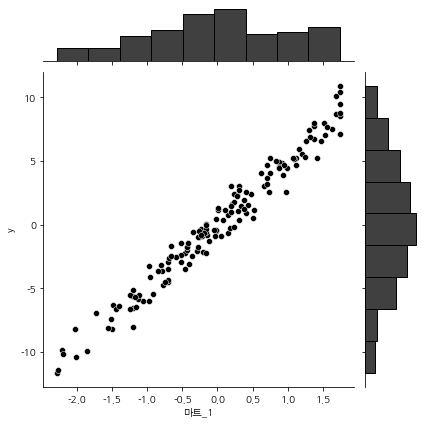

In [12]:
# 반응 변수와 설명 변수 결합
large_data = pd.concat([pd.DataFrame({"y": y}), x], axis=1)

# 산점도 생성
sns.jointplot(y="y", x="마트_1", data=large_data,
              color='black')

In [13]:
### 최소 제곱법 적용

lm_statsmodels = sm.OLS(endog=y, exog=x).fit()
lm_statsmodels.params.head()

마트_1    5.009266
마트_2   -0.089316
마트_3   -0.078687
마트_4    0.123273
마트_5    0.082252
dtype: float64

In [14]:
### sklearn을 이용한 선형 회귀

# 어떤 모델을 만들 것인지 먼저 지정
lm_sklearn = linear_model.LinearRegression()

# 데이터 지정 및 모델 추정
lm_sklearn.fit(x, y)

# 추정된 파라미터(array 형식)
lm_sklearn.coef_

array([ 5.009e+00, -8.932e-02, -7.869e-02,  1.233e-01,  8.225e-02,
       -8.332e-02,  6.204e-03,  5.035e-03,  1.284e-02, -4.794e-02,
        1.276e-01, -1.044e-01,  7.130e-02, -8.724e-02,  1.437e-01,
       -5.599e-02,  6.698e-02, -4.817e-02,  1.437e-02, -1.226e-01,
       -4.269e-02, -2.893e-02,  1.396e-01,  1.132e-01, -1.980e-01,
        1.787e-01,  2.540e-01,  9.118e-03,  1.002e-01, -1.231e-01,
       -9.897e-02, -5.965e-02,  7.224e-03, -2.301e-01, -2.439e-03,
       -1.865e-01, -1.564e-01,  4.108e-02,  1.721e-01,  2.935e-02,
       -8.057e-02,  7.933e-02, -8.786e-02, -1.776e-02,  1.157e-01,
        1.251e-01, -4.349e-02,  1.885e-01, -6.228e-04,  1.391e-01,
       -2.837e-02,  2.088e-01,  1.196e-01, -2.871e-02, -4.699e-02,
        4.374e-02,  1.294e-01,  1.619e-01, -2.553e-03, -4.559e-02,
        1.794e-01,  3.138e-02, -5.407e-02, -2.719e-01,  6.012e-02,
        8.306e-02, -1.366e-01,  5.124e-02,  7.995e-02,  1.063e-01,
        4.201e-02, -1.763e-01,  1.346e-01,  1.186e-01, -8.530e

In [89]:
### Ridge 회귀 - 패널티 항의 영향

# α 변화
n_alphas = 50
ridge_alphas = np.logspace(2, 4, n_alphas)

# 참고
np.log10(ridge_alphas)

array([2.   , 2.041, 2.082, 2.122, 2.163, 2.204, 2.245, 2.286, 2.327,
       2.367, 2.408, 2.449, 2.49 , 2.531, 2.571, 2.612, 2.653, 2.694,
       2.735, 2.776, 2.816, 2.857, 2.898, 2.939, 2.98 , 3.02 , 3.061,
       3.102, 3.143, 3.184, 3.224, 3.265, 3.306, 3.347, 3.388, 3.429,
       3.469, 3.51 , 3.551, 3.592, 3.633, 3.673, 3.714, 3.755, 3.796,
       3.837, 3.878, 3.918, 3.959, 4.   ])

In [90]:
# α를 변경하여 여러 번 Ridge 회귀 실행

# 추정된 회귀 계수를 저장할 리스트
ridge_coefs = []

# for 루프로 여러 번 Ridge 회귀 추정
for a in ridge_alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(x, y)
    ridge_coefs.append(ridge.coef_)

In [91]:
# 추정된 계수를 배열로 변환
ridge_coefs = np.array(ridge_coefs)
ridge_coefs.shape

(50, 100)

In [92]:
ridge_coefs

array([[ 2.339, -0.224, -0.167, ...,  0.024,  0.228, -0.103],
       [ 2.251, -0.219, -0.166, ...,  0.019,  0.226, -0.103],
       [ 2.163, -0.213, -0.165, ...,  0.013,  0.224, -0.102],
       ...,
       [ 0.086, -0.009, -0.011, ..., -0.005,  0.016, -0.007],
       [ 0.078, -0.008, -0.01 , ..., -0.004,  0.015, -0.007],
       [ 0.072, -0.007, -0.009, ..., -0.004,  0.014, -0.006]])

(-8.000, 10.500)

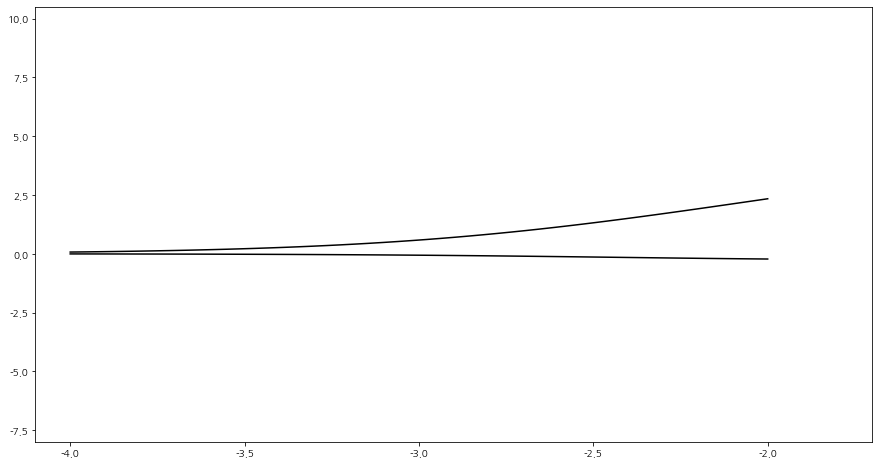

In [96]:
# 참고\
plt.rcParams['figure.figsize'] = (15, 8)

log_alphas = -np.log10(ridge_alphas)
plt.plot(log_alphas, ridge_coefs[::, 0], color='black')

plt.plot(log_alphas, ridge_coefs[::, 1], color='black')

plt.xlim([min(log_alphas)-0.1, max(log_alphas) + 0.3])
plt.ylim([-8, 10.5])

### 가로축에 -log10(α), 세로축에 계수를 놓은 선 그래프

Text(0, 0.5, 'Coefficients')

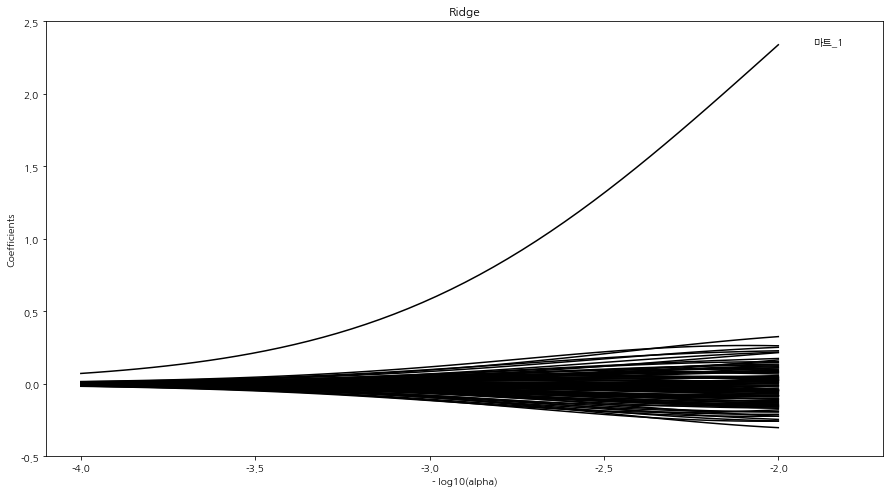

In [99]:
# α 변환
log_alphas = -np.log10(ridge_alphas)

# 가로축에 -log10(α), 세로축에 계수를 놓은 선 그래프
# 100번 반복하지 않아도, 자동으로 선을 100개 그려줌
plt.plot(log_alphas, ridge_coefs, color='black')

# 설명 변수 X_1의 계수를 확인할 수 있도록 표시 추가
plt.text(max(log_alphas) + 0.1, np.array(ridge_coefs)[0, 0], "마트_1")

# X축 범위
plt.xlim([min(log_alphas) - 0.1, max(log_alphas) + 0.3])
plt.ylim([-0.5, 2.5])

# 축 라벨
plt.title("Ridge")
plt.xlabel("- log10(alpha)")
plt.ylabel("Coefficients")

가로축이 -log10(alpha) 이므로, 왼쪽으로 갈수록 aplha가 크고, 정규화의 강도가 강하다.  
따라서, 왼쪽으로 갈수록 계수(coefficient)가 작게 추정되고, 오른쪽으로 갈수록 페널티가 작아지므로 절대치는 크게 추정된다.

### Ridge 회귀 - 최적의 정규화 강도 결정

In [95]:
# CV로 최적의 α 찾기
ridge_best = linear_model.RidgeCV(
    cv=10, alphas=ridge_alphas, fit_intercept=False)
ridge_best.fit(x, y)

# 최적의 -log10(α)
-np.log10(ridge_best.alpha_)

-2.0

In [38]:
# 최적의 α
ridge_best.alpha_

2.3409263765291692

In [21]:
# 최적의 α일 때의 회귀 계수
ridge_best.coef_

array([ 4.748e+00, -1.208e-01, -9.336e-02,  1.018e-01,  6.750e-02,
       -6.612e-02, -1.933e-02,  2.782e-02,  2.018e-02, -2.127e-02,
        1.005e-01, -1.105e-01,  3.315e-02, -7.863e-02,  8.692e-02,
       -7.197e-02,  3.824e-02, -1.556e-02, -9.735e-03, -6.241e-02,
       -7.344e-03,  4.497e-02,  1.123e-01,  9.886e-02, -1.791e-01,
        1.383e-01,  2.740e-01, -3.399e-02,  9.445e-02, -1.140e-01,
       -1.026e-01, -5.477e-02, -5.508e-04, -2.334e-01, -4.203e-02,
       -1.749e-01, -1.346e-01,  8.715e-04,  1.145e-01, -3.360e-02,
       -1.023e-01,  3.724e-02, -8.596e-02, -3.781e-02,  1.241e-01,
        1.941e-02,  2.597e-02,  1.770e-01, -3.138e-02,  1.105e-01,
        4.836e-03,  2.138e-01,  9.267e-02, -1.780e-02, -4.677e-02,
        1.234e-01,  5.100e-02,  1.205e-01,  4.518e-02, -5.067e-02,
        1.767e-01,  1.222e-02, -7.723e-02, -1.758e-01,  3.045e-02,
        3.905e-02, -1.538e-01,  3.896e-02,  7.985e-02,  1.178e-01,
        5.990e-02, -1.509e-01,  1.215e-01,  9.939e-02, -6.964e

### Lasso 회귀

In [22]:
# # α를 변경하여 여러 번 Lasso 회귀 실행
# lasso_alphas, lasso_coefs, _ = linear_model.lasso_path(
#     x, y, fit_intercept=False)

# α를 변경하여 여러 번 Lasso 회귀 실행
lasso_alphas, lasso_coefs, _ = linear_model.lasso_path(x, y, eps=0.001, n_alphas=100)
# Lasso 회귀의 solution-path

Text(0, 0.5, 'Coefficients')

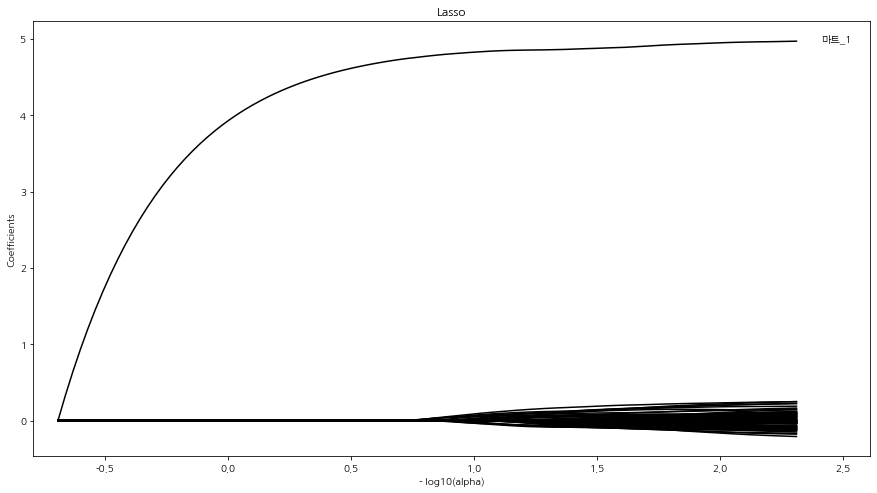

In [100]:
# α 변환
log_alphas = -np.log10(lasso_alphas)

# 가로축에 -log10(α), 세로축에 계수를 놓은 선 그래프
plt.plot(log_alphas, lasso_coefs.T, color='black')

# 설명 변수 X_1의 계수를 확인할 수 있도록 표시 추가
plt.text(max(log_alphas) + 0.1, lasso_coefs[0, -1], "마트_1")
# X축 범위
plt.xlim([min(log_alphas)-0.1, max(log_alphas) + 0.3])
# 축 라벨
plt.title("Lasso")
plt.xlabel("- log10(alpha)")
plt.ylabel("Coefficients")

In [24]:
# CV로 최적의 α 찾기
lasso_best = linear_model.LassoCV(
    cv=10, alphas=lasso_alphas, fit_intercept=False)
lasso_best.fit(x, y)

# 최적의 -log(α)
-np.log10(lasso_best.alpha_)

# 최적의 α
lasso_best.alpha_

# 최적의 α일 때의 회귀 계수
lasso_best.coef_

array([ 4.800e+00, -9.136e-04, -0.000e+00,  0.000e+00, -0.000e+00,
       -0.000e+00,  0.000e+00, -0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00, -0.000e+00,  0.000e+00, -0.000e+00, -0.000e+00,
       -0.000e+00,  0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00,
       -0.000e+00,  4.184e-02,  0.000e+00,  0.000e+00, -0.000e+00,
        0.000e+00,  1.810e-02, -0.000e+00,  0.000e+00, -0.000e+00,
       -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00,
       -9.696e-03, -0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
       -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00,  0.000e+00,
       -0.000e+00,  0.000e+00,  4.026e-02, -0.000e+00,  0.000e+00,
       -0.000e+00,  0.000e+00, -0.000e+00, -0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00, -0.000e+00,  0.000e+00,
       -0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
       -0.000e+00,  0.000e+00,  0.000e+00, -0.000e+00, -0.000e

LASSO 는 대부분의 계수를 0으로 만드는 특징을 가지고 있습니다.